# Loading datasets from database

In [2]:
!python3 -m pip install --upgrade 'sqlalchemy < 2.0'

In [4]:
import pandas as pd
import sqlalchemy

print(pd.__version__)
print(sqlalchemy.__version__)

1.3.5
1.4.54


In [6]:
import pandas as pd
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine


load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = create_engine(DATABASE_URL)

user_data = pd.read_sql(
    """SELECT * FROM public.user_data""",
    con=engine)

user_data

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads
...,...,...,...,...,...,...,...,...
163200,168548,0,36,Russia,Kaliningrad,4,Android,organic
163201,168549,0,18,Russia,Tula,2,Android,organic
163202,168550,1,41,Russia,Yekaterinburg,4,Android,organic
163203,168551,0,38,Russia,Moscow,3,iOS,organic


In [8]:
post_text_df = pd.read_sql(
    """SELECT * FROM public.post_text_df""",
    con=engine
)

post_text_df

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business
...,...,...,...
7018,7315,"OK, I would not normally watch a Farrelly brot...",movie
7019,7316,I give this movie 2 stars purely because of it...,movie
7020,7317,I cant believe this film was allowed to be mad...,movie
7021,7318,The version I saw of this film was the Blockbu...,movie


In [10]:
feed_data = pd.read_sql(
    """SELECT * FROM public.feed_data 
        limit 5000000
    """,
    con=engine
)

feed_data

,timestamp,user_id,post_id,action,target
0,2021-12-01 09:54:24,113839,2671,view,0
1,2021-12-01 09:56:43,113839,958,view,0
2,2021-12-01 09:57:21,113839,2920,view,1
3,2021-12-01 09:58:00,113839,2920,like,0
4,2021-12-01 09:58:02,113839,4065,view,0
...,...,...,...,...,...
4999995,2021-11-03 10:52:08,134945,1215,view,0
4999996,2021-11-03 10:53:06,134945,2935,view,0
4999997,2021-11-03 10:53:54,134945,7106,view,0
4999998,2021-11-03 10:55:11,134945,3564,view,1


In [12]:
### checking balance of classes in target

feed_data['target'].value_counts()

0    4464990
1     535010
Name: target, dtype: int64

# Analysing column "text" in post_text_df

In [15]:
print(post_text_df.loc[67, 'text'])

High fuel costs hit US airlines

Two of the largest airlines in the US - American and Southwest - have blamed record fuel prices for their disappointing quarterly results.

American Airlines parent AMR reported a loss of $387m (£206m) for the fourth quarter of 2004, against a $111m loss for the same period a year earlier. Meanwhile, Southwest Airlines saw its fourth-quarter 2004 profits fall 15% to $56m, against $66m a year earlier. Both said high fuel bills would continue to pressure revenues in 2005. American, the worlds biggest airline by some measures, said it expected to report a loss for the first quarter of 2005. Southwest, which has the highest market value of any US carrier, said it would remain profitable despite high fuel prices.

AMRs shares were flat in Wednesday morning trading on the New York Stock Exchange, as the results were slightly better than analysts had anticipated. AMRs chief executive Gerard Arpey said the airlines difficulties reflected the situation within th

In [17]:
print(post_text_df.loc[876, 'text'])

.@AITCofficial MLA Samaresh Das passes away due to #COVID19

https://t.co/JOJdheLSM5


In [19]:
print(post_text_df.loc[5000, 'text'])

Truly a great film... I stumbled onto it at the video store and rented it because Aaron Eckhart (In the Company of Men and Your Friends and Neighbors) was in it as well as Paulina Porizcova... The lovely former SI swimsuit model does get nude in the film, but that is only one of the many reasons to rent it... Its very exciting, and the character development is fantastic... Eckhart is one of the most underrated actors working, and he steals this film... It is very dark and violent, but I enjoyed in immensely....


In [21]:
### by seeing some of the posts, I think it makes sense to extract couple of features:
### 1) length of post
### 2) number of hashtags
### 3) number of mentions @
### 4) if has a hashtag
### 5) if has an http url

In [23]:
post_text_df['post_length'] = post_text_df['text'].apply(len)

In [25]:
post_text_df['num_hashtags'] = post_text_df['text'].apply(lambda x: x.count('#'))

In [27]:
post_text_df['num_mentions'] = post_text_df['text'].apply(lambda x: x.count('@'))

In [29]:
post_text_df['has_hashtag'] = post_text_df['text'].apply(lambda x: '#' in x)

In [31]:
post_text_df['has_url'] = post_text_df['text'].apply(lambda x: 'http' in x)

In [33]:
### didn't use it yet
###from sklearn.feature_extraction.text import TfidfVectorizer

### tfidf_vectorizer = TfidfVectorizer(
### stop_words='english')

### tfidf_matrix = tfidf_vectorizer.fit_transform(post_text_df['text'])

# Deep learning improvements

In [36]:
### 1. BERT-based Vectorization of Posts & Feature Extraction

In [38]:
from sentence_transformers import SentenceTransformer

In [39]:
### Loading BERT model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

In [43]:
### Getting BERT embeddings

from tqdm import tqdm

# Apply tqdm to track encoding progress
tqdm.pandas(desc="Encoding Posts with BERT")

# Getting BERT embeddings with progress bar
post_text_df['post_embedding'] = post_text_df['text'].progress_apply(lambda x: bert_model.encode(x))

Encoding Posts with BERT: 100%|█████████████| 7023/7023 [04:59<00:00, 23.47it/s]


In [45]:
import numpy as np
# Converting embeddings into new features (mean, max, min)
post_text_df['embedding_mean'] = post_text_df['post_embedding'].apply(lambda x: np.mean(x))
post_text_df['embedding_max'] = post_text_df['post_embedding'].apply(lambda x: np.max(x))
post_text_df['embedding_min'] = post_text_df['post_embedding'].apply(lambda x: np.min(x))

In [47]:
# Drop raw embeddings (optional)
post_text_df.drop(columns=['post_embedding'], inplace=True)

In [49]:
post_text_df

,post_id,text,topic,post_length,num_hashtags,num_mentions,has_hashtag,has_url,embedding_mean,embedding_max,embedding_min
0,1,UK economy facing major risks\n\nThe UK manufa...,business,1967,0,0,False,False,-0.000771,0.150771,-0.140247
1,2,Aids and climate top Davos agenda\n\nClimate c...,business,2701,0,0,False,False,-0.001662,0.144552,-0.151125
2,3,Asian quake hits European shares\n\nShares in ...,business,3408,0,0,False,False,-0.001554,0.143036,-0.144040
3,4,India power shares jump on debut\n\nShares in ...,business,1026,0,0,False,False,-0.000081,0.137932,-0.174149
4,5,Lacroix label bought by US firm\n\nLuxury good...,business,889,0,0,False,False,0.000010,0.162679,-0.154663
...,...,...,...,...,...,...,...,...,...,...,...
7018,7315,"OK, I would not normally watch a Farrelly brot...",movie,803,0,0,False,False,-0.000816,0.164095,-0.128535
7019,7316,I give this movie 2 stars purely because of it...,movie,800,0,0,False,False,-0.001117,0.138495,-0.138613
7020,7317,I cant believe this film was allowed to be mad...,movie,636,0,0,False,False,-0.000882,0.152540,-0.209523
7021,7318,The version I saw of this film was the Blockbu...,movie,728,0,0,False,False,-0.000055,0.187223,-0.138941


In [51]:
post_text_df = post_text_df.drop('text', axis=1)

# Merging datasets

In [54]:
df = pd.merge(
    feed_data,
    user_data,
    on='user_id',
    how='left'
)

df.head()

,timestamp,user_id,post_id,action,target,gender,age,country,city,exp_group,os,source
0,2021-12-01 09:54:24,113839,2671,view,0,0,22,Russia,Mukhorshibir,0,Android,organic
1,2021-12-01 09:56:43,113839,958,view,0,0,22,Russia,Mukhorshibir,0,Android,organic
2,2021-12-01 09:57:21,113839,2920,view,1,0,22,Russia,Mukhorshibir,0,Android,organic
3,2021-12-01 09:58:00,113839,2920,like,0,0,22,Russia,Mukhorshibir,0,Android,organic
4,2021-12-01 09:58:02,113839,4065,view,0,0,22,Russia,Mukhorshibir,0,Android,organic


In [55]:
data = pd.merge(
    df,
    post_text_df,
    on='post_id',
    how='left'
)
data

,timestamp,user_id,post_id,action,target,gender,age,country,city,exp_group,...,source,topic,post_length,num_hashtags,num_mentions,has_hashtag,has_url,embedding_mean,embedding_max,embedding_min
0,2021-12-01 09:54:24,113839,2671,view,0,0,22,Russia,Mukhorshibir,0,...,organic,covid,140,5,0,True,True,0.000048,0.157537,-0.127631
1,2021-12-01 09:56:43,113839,958,view,0,0,22,Russia,Mukhorshibir,0,...,organic,politics,2511,0,0,False,False,-0.001483,0.140069,-0.137478
2,2021-12-01 09:57:21,113839,2920,view,1,0,22,Russia,Mukhorshibir,0,...,organic,covid,129,1,1,True,False,-0.001569,0.157978,-0.128868
3,2021-12-01 09:58:00,113839,2920,like,0,0,22,Russia,Mukhorshibir,0,...,organic,covid,129,1,1,True,False,-0.001569,0.157978,-0.128868
4,2021-12-01 09:58:02,113839,4065,view,0,0,22,Russia,Mukhorshibir,0,...,organic,covid,138,0,0,False,True,-0.000809,0.160906,-0.194510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,2021-11-03 10:52:08,134945,1215,view,0,0,18,Russia,Nizhniy Novgorod,1,...,organic,politics,1448,0,0,False,False,-0.002096,0.136274,-0.136329
4999996,2021-11-03 10:53:06,134945,2935,view,0,0,18,Russia,Nizhniy Novgorod,1,...,organic,covid,139,0,0,False,True,-0.001349,0.133606,-0.158631
4999997,2021-11-03 10:53:54,134945,7106,view,0,0,18,Russia,Nizhniy Novgorod,1,...,organic,movie,1888,0,0,False,False,-0.001243,0.200487,-0.169292
4999998,2021-11-03 10:55:11,134945,3564,view,1,0,18,Russia,Nizhniy Novgorod,1,...,organic,covid,139,4,1,True,True,-0.000593,0.168585,-0.140497


# Analysing numeric and categorical columns

In [57]:
### checking numeric columns
import numpy as np

numeric_columns = data.loc[:,data.dtypes!=np.object_].columns
data.loc[:,data.dtypes!=np.object_].head(2)

,timestamp,user_id,post_id,target,gender,age,exp_group,post_length,num_hashtags,num_mentions,has_hashtag,has_url,embedding_mean,embedding_max,embedding_min
0,2021-12-01 09:54:24,113839,2671,0,0,22,0,140,5,0,True,True,0.000048,0.157537,-0.127631
1,2021-12-01 09:56:43,113839,958,0,0,22,0,2511,0,0,False,False,-0.001483,0.140069,-0.137478


In [59]:
### checking categorical columns

categorical_columns = data.loc[:,data.dtypes==np.object_].columns
data.loc[:,data.dtypes==np.object_].head(2)

,action,country,city,os,source,topic
0,view,Russia,Mukhorshibir,Android,organic,covid
1,view,Russia,Mukhorshibir,Android,organic,politics


In [60]:
### target should eventually be removed from numeric columns

In [61]:
### gender, exp_group, has_hashtag, has_url are also categorical columns

In [62]:
### moving gender, exp_group, has_hashtag, has_url to categorical columns

categorical_as_object = ['gender', 'exp_group', 'has_hashtag', 'has_url', ] 

data[categorical_as_object] = data[categorical_as_object].astype('object')

In [69]:
### checking categorical columns

categorical_columns = data.loc[:,data.dtypes==np.object_].columns
data.loc[:,data.dtypes==np.object_].head(2)

,action,gender,country,city,exp_group,os,source,topic,has_hashtag,has_url
0,view,0,Russia,Mukhorshibir,0,Android,organic,covid,True,True
1,view,0,Russia,Mukhorshibir,0,Android,organic,politics,False,False


In [70]:
### checking numeric columns

numeric_columns = data.loc[:,data.dtypes!=np.object_].columns
data.loc[:,data.dtypes!=np.object_].head(2)

,timestamp,user_id,post_id,target,age,post_length,num_hashtags,num_mentions,embedding_mean,embedding_max,embedding_min
0,2021-12-01 09:54:24,113839,2671,0,22,140,5,0,0.000048,0.157537,-0.127631
1,2021-12-01 09:56:43,113839,958,0,22,2511,0,0,-0.001483,0.140069,-0.137478


In [71]:
### correlation between numeric features

data[numeric_columns].corr()

,user_id,post_id,target,age,post_length,num_hashtags,num_mentions,embedding_mean,embedding_max,embedding_min
user_id,1.000000,-0.000459,-0.001069,0.001047,-0.000261,0.000708,-0.000240,0.000257,-0.000561,-0.000698
post_id,-0.000459,1.000000,0.003036,-0.022179,-0.276385,-0.024833,-0.008331,0.090078,0.003717,0.039899
target,-0.001069,0.003036,1.000000,-0.001241,-0.003290,-0.003379,-0.000599,0.000773,0.000709,0.001680
age,0.001047,-0.022179,-0.001241,1.000000,0.007324,0.009087,0.003795,0.002049,-0.000012,-0.004687
post_length,-0.000261,-0.276385,-0.003290,0.007324,1.000000,-0.316416,-0.193450,-0.154241,-0.020641,0.046749
num_hashtags,0.000708,-0.024833,-0.003379,0.009087,-0.316416,1.000000,0.120772,-0.004481,-0.011973,-0.034682
num_mentions,-0.000240,-0.008331,-0.000599,0.003795,-0.193450,0.120772,1.000000,0.010508,0.021643,-0.028219
embedding_mean,0.000257,0.090078,0.000773,0.002049,-0.154241,-0.004481,0.010508,1.000000,0.034133,0.004034
embedding_max,-0.000561,0.003717,0.000709,-0.000012,-0.020641,-0.011973,0.021643,0.034133,1.000000,0.092558
embedding_min,-0.000698,0.039899,0.001680,-0.004687,0.046749,-0.034682,-0.028219,0.004034,0.092558,1.000000


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


<Axes: >

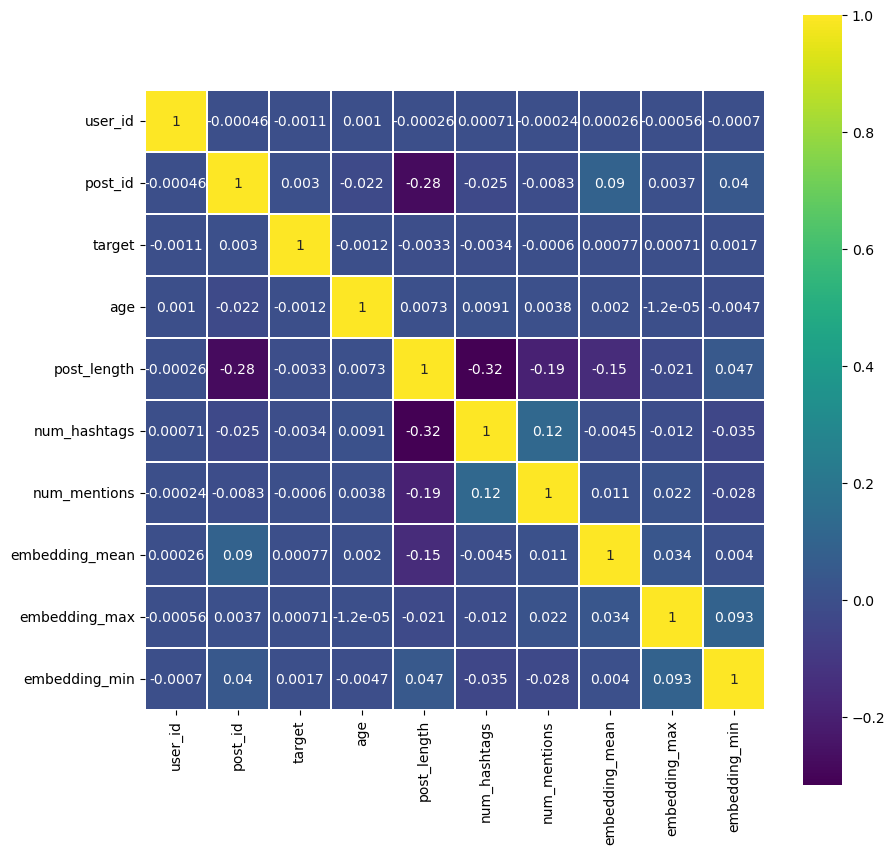

In [75]:
### correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

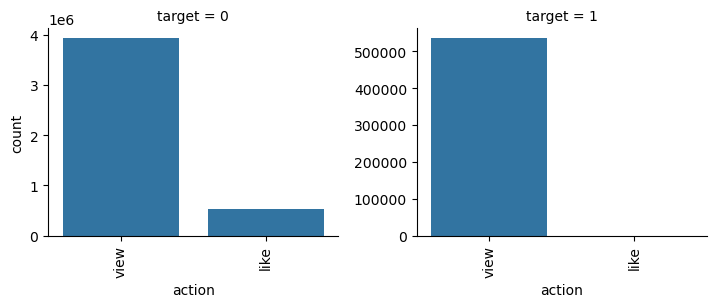

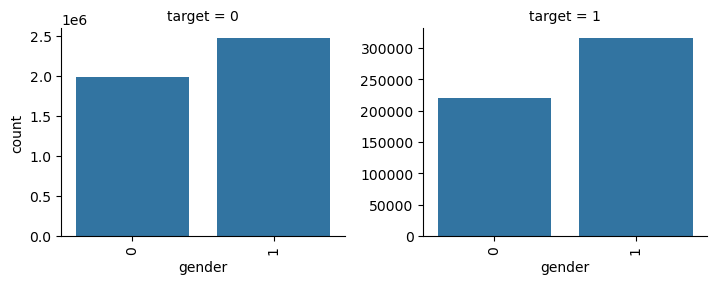

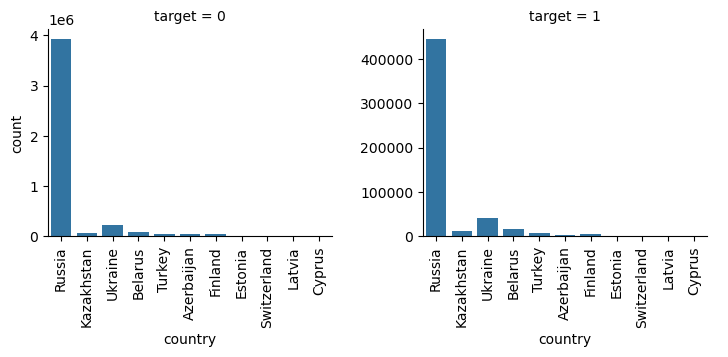

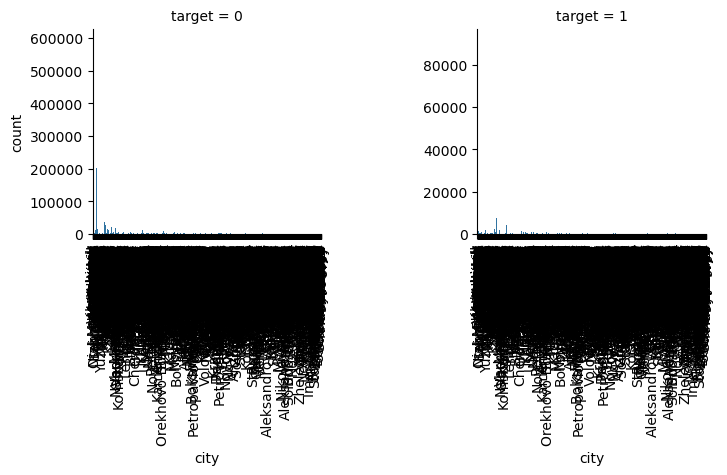

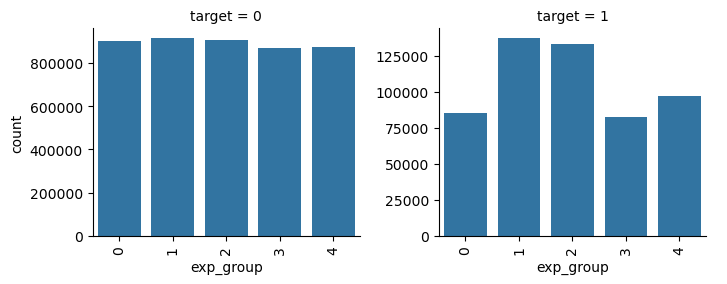

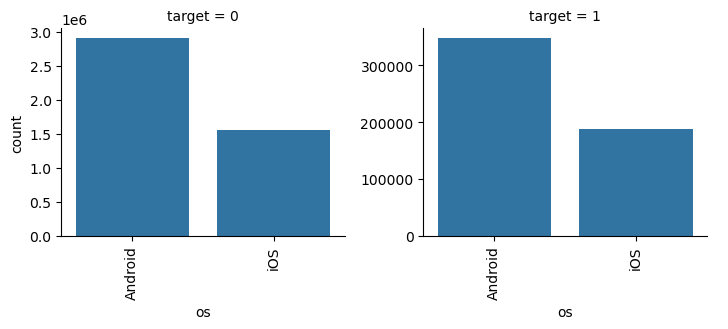

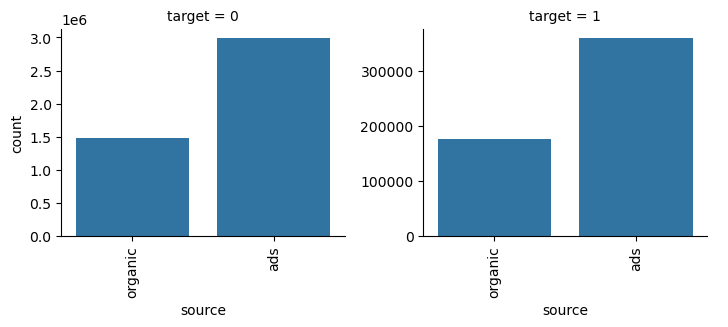

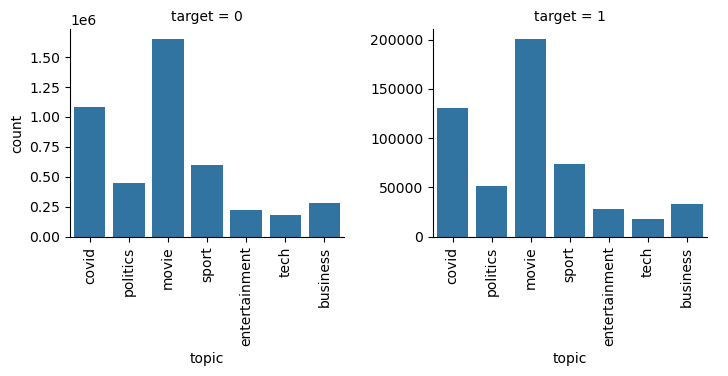

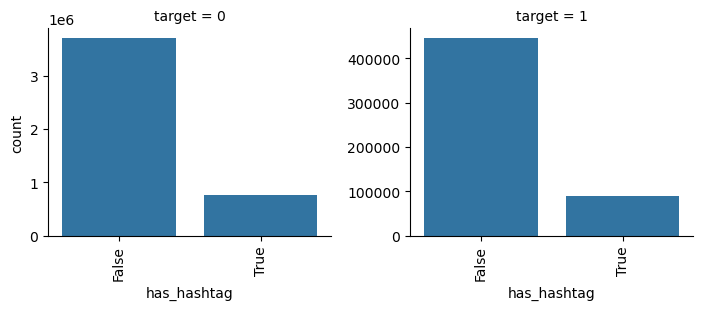

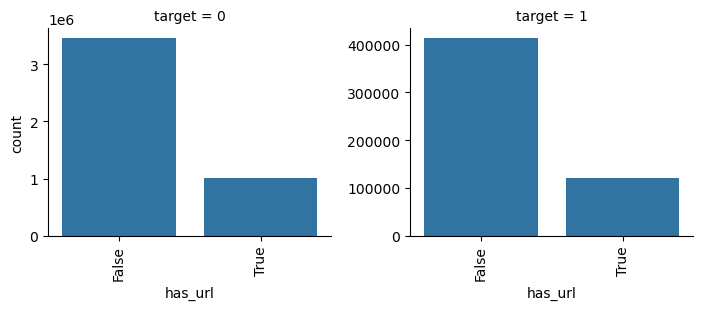

In [77]:
### Histograms of distribution between classes

for col in categorical_columns:
    g = sns.catplot(x=col, kind='count', col='target', data=data, sharey=False, height=3, aspect=1.2)
    g.set_xticklabels(rotation=90)

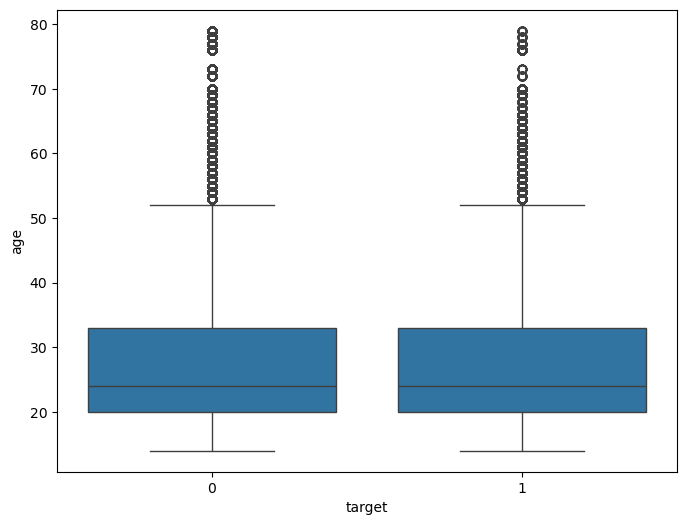

In [78]:
### distribution of age vs target

fig = plt.figure()
fig.set_size_inches(8,6)
sns.boxplot(y=data['age'], x=data['target'].astype('category'), data = data)
plt.show()

In [83]:
### check nans

data.isna().sum()

timestamp         0
user_id           0
post_id           0
action            0
target            0
gender            0
age               0
country           0
city              0
exp_group         0
os                0
source            0
topic             0
post_length       0
num_hashtags      0
num_mentions      0
has_hashtag       0
has_url           0
embedding_mean    0
embedding_max     0
embedding_min     0
dtype: int64

In [85]:
data

,timestamp,user_id,post_id,action,target,gender,age,country,city,exp_group,...,source,topic,post_length,num_hashtags,num_mentions,has_hashtag,has_url,embedding_mean,embedding_max,embedding_min
0,2021-12-01 09:54:24,113839,2671,view,0,0,22,Russia,Mukhorshibir,0,...,organic,covid,140,5,0,True,True,0.000048,0.157537,-0.127631
1,2021-12-01 09:56:43,113839,958,view,0,0,22,Russia,Mukhorshibir,0,...,organic,politics,2511,0,0,False,False,-0.001483,0.140069,-0.137478
2,2021-12-01 09:57:21,113839,2920,view,1,0,22,Russia,Mukhorshibir,0,...,organic,covid,129,1,1,True,False,-0.001569,0.157978,-0.128868
3,2021-12-01 09:58:00,113839,2920,like,0,0,22,Russia,Mukhorshibir,0,...,organic,covid,129,1,1,True,False,-0.001569,0.157978,-0.128868
4,2021-12-01 09:58:02,113839,4065,view,0,0,22,Russia,Mukhorshibir,0,...,organic,covid,138,0,0,False,True,-0.000809,0.160906,-0.194510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,2021-11-03 10:52:08,134945,1215,view,0,0,18,Russia,Nizhniy Novgorod,1,...,organic,politics,1448,0,0,False,False,-0.002096,0.136274,-0.136329
4999996,2021-11-03 10:53:06,134945,2935,view,0,0,18,Russia,Nizhniy Novgorod,1,...,organic,covid,139,0,0,False,True,-0.001349,0.133606,-0.158631
4999997,2021-11-03 10:53:54,134945,7106,view,0,0,18,Russia,Nizhniy Novgorod,1,...,organic,movie,1888,0,0,False,False,-0.001243,0.200487,-0.169292
4999998,2021-11-03 10:55:11,134945,3564,view,1,0,18,Russia,Nizhniy Novgorod,1,...,organic,covid,139,4,1,True,True,-0.000593,0.168585,-0.140497


# Train and test sample

In [88]:
sorted_data = data.sort_values('timestamp')

In [89]:
sorted_data = sorted_data.drop(['action', 'timestamp', 'post_id', 'user_id'], axis=1)

In [90]:
train = sorted_data.iloc[:-1000000].copy() 
test = sorted_data.iloc[-1000000:].copy() 

In [92]:
train

,target,gender,age,country,city,exp_group,os,source,topic,post_length,num_hashtags,num_mentions,has_hashtag,has_url,embedding_mean,embedding_max,embedding_min
4721097,0,0,32,Russia,Yekaterinburg,1,iOS,ads,covid,137,1,0,True,True,-0.000133,0.171761,-0.134539
4641762,0,0,27,Russia,Astrakhan,0,Android,organic,entertainment,872,0,0,False,False,-0.000221,0.132975,-0.143927
3872200,0,0,20,Russia,Kudryashovskiy,0,Android,organic,covid,138,1,0,True,True,-0.000243,0.152327,-0.151883
4996297,0,1,33,Russia,Novosibirsk,2,Android,ads,covid,128,0,0,False,True,-0.001102,0.142515,-0.171672
3404939,0,1,22,Russia,Nar’yan-Mar,3,Android,ads,movie,1091,0,0,False,False,-0.000033,0.123151,-0.169702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916613,0,1,26,Russia,Izhevsk,4,Android,organic,politics,1409,0,0,False,False,-0.001670,0.136468,-0.141336
4782676,0,1,21,Turkey,Samsun,0,Android,organic,covid,130,1,0,True,True,-0.000252,0.164151,-0.165029
3913452,0,0,46,Russia,Borzya,2,Android,ads,sport,873,0,0,False,False,-0.000296,0.140686,-0.137401
4695216,1,0,28,Ukraine,Odesa,4,Android,ads,movie,1009,0,0,False,False,-0.001008,0.154073,-0.155192


In [96]:
test

,target,gender,age,country,city,exp_group,os,source,topic,post_length,num_hashtags,num_mentions,has_hashtag,has_url,embedding_mean,embedding_max,embedding_min
4882008,0,1,20,Russia,Moscow,3,iOS,organic,movie,1838,0,0,False,False,-0.000904,0.155087,-0.139756
4933753,0,0,18,Russia,Ryazan,1,Android,ads,covid,135,0,0,False,True,0.000155,0.147859,-0.146816
3658074,0,0,21,Russia,Staraya Mayna,4,Android,ads,politics,4009,0,0,False,False,-0.000871,0.120337,-0.130568
4404480,0,1,29,Russia,Saint Petersburg,4,Android,organic,sport,1284,0,0,False,False,0.000124,0.125488,-0.150451
3474380,0,0,21,Russia,Chelyabinsk,0,Android,ads,sport,924,0,0,False,False,-0.000188,0.113984,-0.185816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436433,0,0,40,Russia,Moscow,4,Android,ads,sport,920,0,0,False,False,-0.000913,0.154683,-0.212631
1687302,0,0,18,Russia,Tikhvin,4,Android,ads,covid,134,3,0,True,True,0.000250,0.178123,-0.161674
274771,0,0,34,Russia,Saint Petersburg,1,Android,ads,politics,2822,0,0,False,False,-0.001003,0.155048,-0.142531
1106069,0,1,35,Ukraine,Zolotonosha,3,iOS,ads,sport,2835,0,0,False,False,-0.000540,0.156344,-0.168503


In [98]:
### Seperating data on features and target

X_train = train.drop('target', axis=1)
X_test = test.drop('target', axis=1)

y_train = train['target']
y_test = test['target']

# Transformer for categorical and numeric columns

In [101]:
categorical_columns

Index(['action', 'gender', 'country', 'city', 'exp_group', 'os', 'source',
       'topic', 'has_hashtag', 'has_url'],
      dtype='object')

In [103]:
categorical_columns = categorical_columns.difference(['action'])

In [105]:
categorical_columns

Index(['city', 'country', 'exp_group', 'gender', 'has_hashtag', 'has_url',
       'os', 'source', 'topic'],
      dtype='object')

In [107]:
numeric_columns

Index(['timestamp', 'user_id', 'post_id', 'target', 'age', 'post_length',
       'num_hashtags', 'num_mentions', 'embedding_mean', 'embedding_max',
       'embedding_min'],
      dtype='object')

In [109]:
list(X_train.select_dtypes(include=['float64', 'int64']).columns)

['age', 'post_length', 'num_hashtags', 'num_mentions']

In [111]:
numeric_cols = list(X_train.select_dtypes(include=['float64', 'int64']).columns)

print(numeric_cols)

['age', 'post_length', 'num_hashtags', 'num_mentions']


In [113]:
# Ensure 'embedding_mean', 'embedding_max', 'embedding_min' are included
required_numeric_cols = ['embedding_mean', 'embedding_max', 'embedding_min']
numeric_cols = list(set(numeric_cols) | set(required_numeric_cols))  # Union of sets

print(numeric_cols)

['embedding_min', 'num_hashtags', 'num_mentions', 'embedding_max', 'post_length', 'embedding_mean', 'age']


In [115]:
### creating transformer for categorical features

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Your code is here

### saving the cols for OHE, mean target encoders, numeric cols

cols_for_ohe = [x for x in categorical_columns if X_train[x].nunique() < 5]
cols_for_mte = [x for x in categorical_columns if X_train[x].nunique() >= 5]

### saving indeces of these cols

cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]
numeric_cols_idx = [list(X_train.columns).index(col) for col in numeric_cols]

In [116]:
t = [('OneHotEncoder', OneHotEncoder(), cols_for_ohe_idx), ### indices are added here. best to add as list of indices. not the names of cols
     ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_idx),
     ('StandardScaler', StandardScaler(), numeric_cols_idx)]

col_transform = ColumnTransformer(transformers=t)

In [119]:
np.random.seed(1)

col_transform.fit(X_train, y_train)

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 [0, 11, 12, 5, 6]),
                                ('MeanTargetEncoder', TargetEncoder(),
                                 [3, 2, 4, 7]),
                                ('StandardScaler', StandardScaler(),
                                 [15, 9, 10, 14, 8, 13, 1])])

# Decision Tree with default parameters

In [122]:
### model for Decision Tree with default parameters
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### Your code is here
np.random.seed(1)
pipe_dt = Pipeline([("column_transformer", 
                     col_transform), 
                    ("decision_tree", 
                     DecisionTreeClassifier())])

start_time = time.time()

pipe_dt.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"Training time: {training_time:.2f} seconds")

Training time: 59.57 seconds


In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


y_pred_train = pipe_dt.predict(X_train)
y_pred_test = pipe_dt.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='weighted').round(3)


print("Accuracy train:", accuracy_train)
print("Accuracy test:", accuracy_test)
print("F1 score test:", f1)

Accuracy train: 0.89650375
Accuracy test: 0.878976
F1 score test: 0.822


# Catboost model

In [126]:
### building catboost model - Control Model (Baseline)

from catboost import CatBoostClassifier

np.random.seed(1)

catboost_control = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, l2_leaf_reg=3)

start_time = time.time()
catboost_control.fit(X_train, y_train, cat_features=['gender', 'country', 'city', 'exp_group', 'os', 'source',
       'topic', 'has_hashtag', 'has_url'])
print(f"Control Model Training Time: {time.time() - start_time:.2f} seconds")

0:	learn: 0.6334054	total: 566ms	remaining: 56s
1:	learn: 0.5846764	total: 1.01s	remaining: 49.7s
2:	learn: 0.5444780	total: 1.4s	remaining: 45.2s
3:	learn: 0.5110397	total: 1.8s	remaining: 43.3s
4:	learn: 0.4830589	total: 2.37s	remaining: 45s
5:	learn: 0.4595119	total: 2.77s	remaining: 43.3s
6:	learn: 0.4396628	total: 3.14s	remaining: 41.8s
7:	learn: 0.4227917	total: 3.52s	remaining: 40.5s
8:	learn: 0.4084737	total: 3.87s	remaining: 39.2s
9:	learn: 0.3963492	total: 4.19s	remaining: 37.7s
10:	learn: 0.3858656	total: 4.6s	remaining: 37.2s
11:	learn: 0.3770357	total: 5.06s	remaining: 37.1s
12:	learn: 0.3696079	total: 5.41s	remaining: 36.2s
13:	learn: 0.3632972	total: 5.74s	remaining: 35.3s
14:	learn: 0.3579760	total: 6.07s	remaining: 34.4s
15:	learn: 0.3534609	total: 6.37s	remaining: 33.4s
16:	learn: 0.3496674	total: 6.62s	remaining: 32.3s
17:	learn: 0.3465109	total: 6.82s	remaining: 31.1s
18:	learn: 0.3438992	total: 6.98s	remaining: 29.8s
19:	learn: 0.3416280	total: 7.22s	remaining: 28.

In [135]:
y_pred_train_control = catboost_control.predict(X_train)
y_pred_test_control = catboost_control.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train_control)
accuracy_test = accuracy_score(y_test, y_pred_test_control)
f1 = f1_score(y_test, y_pred_test_control, average='weighted').round(3)


print("Accuracy train Control:", accuracy_train)
print("Accuracy test Control:", accuracy_test)
print("F1 score test Control:", f1)

Accuracy train Control: 0.89650325
Accuracy test Control: 0.878977
F1 score test Control: 0.822


In [136]:
feature_names = X_train.columns
importances = catboost_control.feature_importances_

# Print feature importance
for feature, importance in zip(feature_names, importances):
    print(f'{feature}: {importance}')

gender: 1.7717966407930106
age: 23.84397863634555
country: 5.576095854273724
city: 28.66594278109379
exp_group: 3.991591800961595
os: 0.0010106708217503372
source: 0.008930892287337748
topic: 31.335843308421563
post_length: 2.3396780226319445
num_hashtags: 0.9732908785650026
num_mentions: 0.0546444567078268
has_hashtag: 0.5606409584397986
has_url: 0.2943081747478388
embedding_mean: 0.436205336010965
embedding_max: 0.06392066271408436
embedding_min: 0.08212092518421864


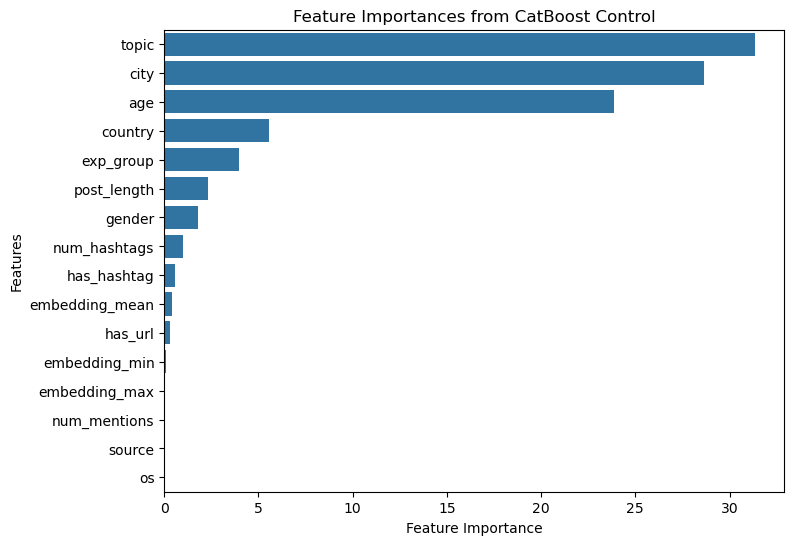

In [137]:
# DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', orient='h')
plt.title('Feature Importances from CatBoost Control')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [134]:
### building Test Model (Tweaked Hyperparameters): TG - Test Group
catboost_test = CatBoostClassifier(iterations=200, depth=8, learning_rate=0.05, l2_leaf_reg=10)

start_time = time.time()
catboost_test.fit(X_train, y_train, cat_features=['gender', 'country', 'city', 'exp_group', 'os', 'source',
       'topic', 'has_hashtag', 'has_url'])
print(f"Test Model Training Time: {time.time() - start_time:.2f} seconds")

0:	learn: 0.6515289	total: 1.89s	remaining: 6m 16s
1:	learn: 0.6147190	total: 3.08s	remaining: 5m 5s
2:	learn: 0.5817339	total: 4.58s	remaining: 5m 1s
3:	learn: 0.5530058	total: 5.95s	remaining: 4m 51s
4:	learn: 0.5275144	total: 7.28s	remaining: 4m 44s
5:	learn: 0.5053050	total: 7.83s	remaining: 4m 13s
6:	learn: 0.4855769	total: 9.05s	remaining: 4m 9s
7:	learn: 0.4681272	total: 9.75s	remaining: 3m 53s
8:	learn: 0.4524437	total: 11.1s	remaining: 3m 56s
9:	learn: 0.4389485	total: 11.8s	remaining: 3m 44s
10:	learn: 0.4267707	total: 12.8s	remaining: 3m 39s
11:	learn: 0.4159582	total: 14.3s	remaining: 3m 43s
12:	learn: 0.4066353	total: 14.9s	remaining: 3m 33s
13:	learn: 0.3983803	total: 15.3s	remaining: 3m 23s
14:	learn: 0.3906721	total: 16.4s	remaining: 3m 22s
15:	learn: 0.3841387	total: 16.9s	remaining: 3m 14s
16:	learn: 0.3781683	total: 18.2s	remaining: 3m 16s
17:	learn: 0.3729459	total: 19.1s	remaining: 3m 13s
18:	learn: 0.3684304	total: 19.7s	remaining: 3m 7s
19:	learn: 0.3643737	total

In [142]:
y_pred_train_TG = catboost_test.predict(X_train)
y_pred_test_TG = catboost_test.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train_TG)
accuracy_test = accuracy_score(y_test, y_pred_test_TG)
f1 = f1_score(y_test, y_pred_test_TG, average='weighted').round(3)


print("Accuracy train Test Group:", accuracy_train)
print("Accuracy test Test Group:", accuracy_test)
print("F1 score test Test Group:", f1)

Accuracy train Test Group: 0.89650325
Accuracy test Test Group: 0.878977
F1 score test Test Group: 0.822


In [144]:
feature_names = X_train.columns
importances = catboost_test.feature_importances_

# Print feature importance
for feature, importance in zip(feature_names, importances):
    print(f'{feature}: {importance}')

gender: 1.9938640913256112
age: 22.56283224569014
country: 12.139978424694338
city: 21.131854194722898
exp_group: 10.905874353639334
os: 0.011190841704518692
source: 0.3283530101293745
topic: 19.84072988715617
post_length: 2.187352149893023
num_hashtags: 2.904980561983712
num_mentions: 0.7986091822143652
has_hashtag: 0.6626266097830433
has_url: 0.647453814173102
embedding_mean: 1.9023612971776829
embedding_max: 0.8219452131367452
embedding_min: 1.1599941225757708


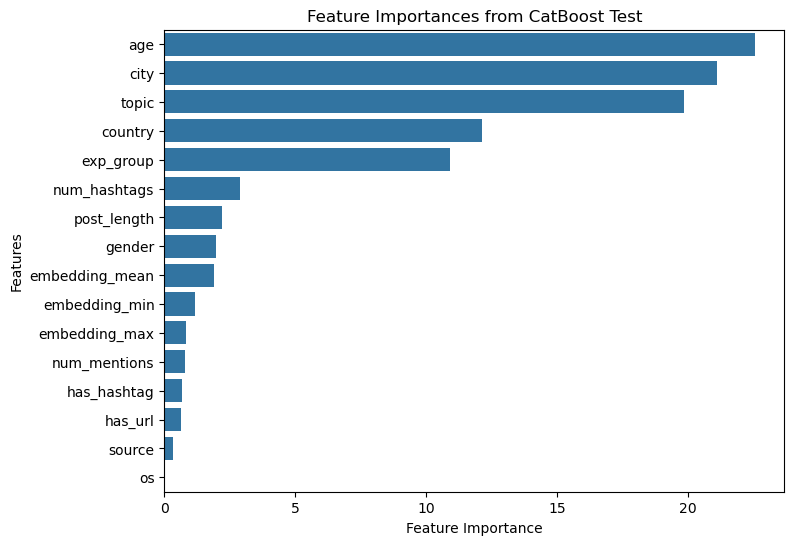

In [146]:
# DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', orient='h')
plt.title('Feature Importances from CatBoost Test')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [148]:
catboost_control.save_model('catboost_control.cbm',
                           format="cbm")

catboost_test.save_model('catboost_test.cbm',
                           format="cbm")


from_file = CatBoostClassifier()  # здесь не указываем параметры, которые были при обучении, в дампе модели все есть

from_file.load_model("catboost_control.cbm")

from_file.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [150]:
from_file.load_model("catboost_test.cbm")

from_file.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [152]:
import os
from catboost import CatBoostClassifier


def get_model_path(model_name: str) -> str:
    if os.environ.get("IS_LMS") == "1":  
        return f"/workdir/user_input/{model_name}"
    else:
        return f"/Users/daraluzina/ML/HW_22/Ver_4.0/{model_name}"

def load_models():
    model_control = CatBoostClassifier()
    model_test = CatBoostClassifier()
    
    model_control.load_model(get_model_path("catboost_control.cbm"))
    model_test.load_model(get_model_path("catboost_test.cbm"))
    
    return model_control, model_test


In [154]:
model_control, model_test = load_models()

In [156]:
model_control.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [158]:
model_test.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])